# 1. Description of the Dataset

## The Boston Housing Dataset

The Boston Housing Dataset is a derived from information collected by the U.S. Census Service concerning housing in the area of <a href='https://www.cs.toronto.edu/~delve/data/boston/bostonDetail.html'>Boston MA</a>. The following describes the dataset columns:

* CRIM - per capita crime rate by town
* ZN - proportion of residential land zoned for lots over 25,000 sq.ft.
* INDUS - proportion of non-retail business acres per town.
* CHAS - Charles River dummy variable (1 if tract bounds river; 0 otherwise)
* NOX - nitric oxides concentration (parts per 10 million)
* RM - average number of rooms per dwelling
* AGE - proportion of owner-occupied units built prior to 1940
* DIS - weighted distances to five Boston employment centres
* RAD - index of accessibility to radial highways
* TAX - full-value property-tax rate per $10,000
* PTRATIO - pupil-teacher ratio by town
* B - 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town
* LSTAT - % lower status of the population
* MEDV - Median value of owner-occupied homes in $1000's

# 2. Importing required dependencies

In [1]:
import os

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

import warnings
warnings.filterwarnings('ignore')

In [2]:
os.listdir(r"C:\Users\erpra\Documents\Machine_learning\regression\boston\housing.csv")

['boston.ipynb', 'housing.csv']

# 3. Loading the Dataset

In [3]:
#defining the column name
col_names = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']

# Loading the dataset
df = pd.read_csv(r"C:\Users\erpra\Documents\Machine_learning\classification\boston\housing.csv", header=None, names=col_names, delimiter=r"\s+")
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


# 4. Exploratory Data Analysis

In [4]:
print('='*20+'>Checking the dataset<'+'='*20, '\n\n')

print(f"The shape of the dataset is {df.shape}.")
print(f"Number of columns in the dataset are {df.shape[1]}.")
print(f"Datatypes of each columns \n\n{df.dtypes}\n")
print(f"Total numbers of Null values in the Dataset {sum(df.isna().sum().values)}")

====================>Checking the dataset<==================== 


The shape of the dataset is (506, 14).
Number of columns in the dataset are 14.
Datatypes of each columns 

CRIM       float64
ZN         float64
INDUS      float64
CHAS         int64
NOX        float64
RM         float64
AGE        float64
DIS        float64
RAD          int64
TAX        float64
PTRATIO    float64
B          float64
LSTAT      float64
MEDV       float64
dtype: object

Total numbers of Null values in the Dataset 0


In [5]:
# Summarizing the data to see the distribution
df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


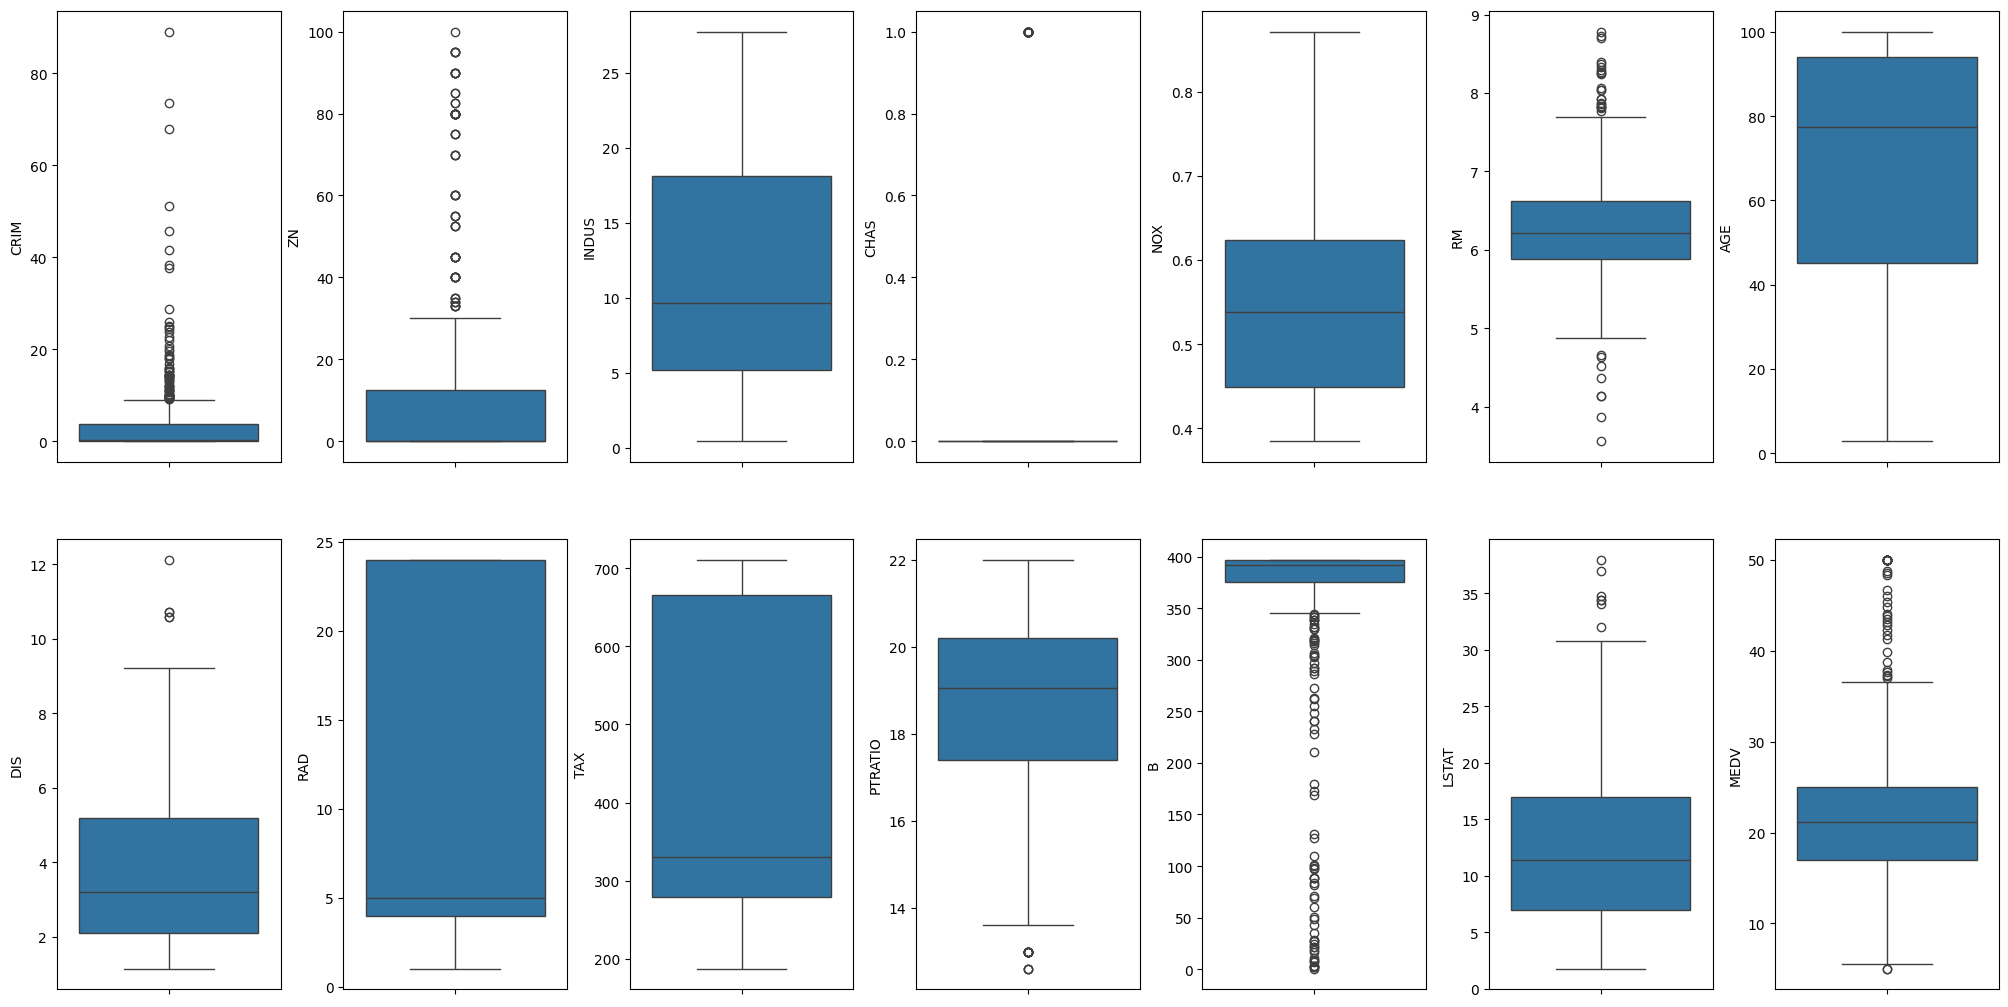

In [6]:
fig, axs = plt.subplots(ncols=7, nrows=2, figsize=(20,10))
index = 0
axs = axs.flatten()
for col_name, val in df.items():
    sns.boxplot(y=col_name, data=df, ax=axs[index])
    index += 1

plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=5.0)

*Columns like CRIM, ZN, RM, B seems to have outliers. Let's see the outliers percentage in every column.*

In [7]:
# Checking the outliers in each column

for col_name, val in df.items():
    # quantile value at 25% and 75%
    q1 = val.quantile(0.25)
    q3 = val.quantile(0.75)
    # inter quartile range
    iqr = q3 - q1

    # filtering the data 
    val_col = val[(val<= q1 - 1.5*iqr) | (val >= (q3 + 1.5 * iqr))]

    # total percentage of outliers
    perc = np.shape(val_col)[0] * 100 / np.shape(df)[0]
    print("Column %s outliers = %.2f%%" %(col_name, perc))

Column CRIM outliers = 13.04%
Column ZN outliers = 13.44%
Column INDUS outliers = 0.00%
Column CHAS outliers = 100.00%
Column NOX outliers = 0.00%
Column RM outliers = 5.93%
Column AGE outliers = 0.00%
Column DIS outliers = 0.99%
Column RAD outliers = 0.00%
Column TAX outliers = 0.00%
Column PTRATIO outliers = 2.96%
Column B outliers = 15.22%
Column LSTAT outliers = 1.38%
Column MEDV outliers = 7.91%


*Let's remove MEDV outliers, (MEDV=50) before plotting the distribution*

In [8]:
df = df[~(df['MEDV'] >= 50)]

*Let's see how these features plus MEDV distributions looks like*

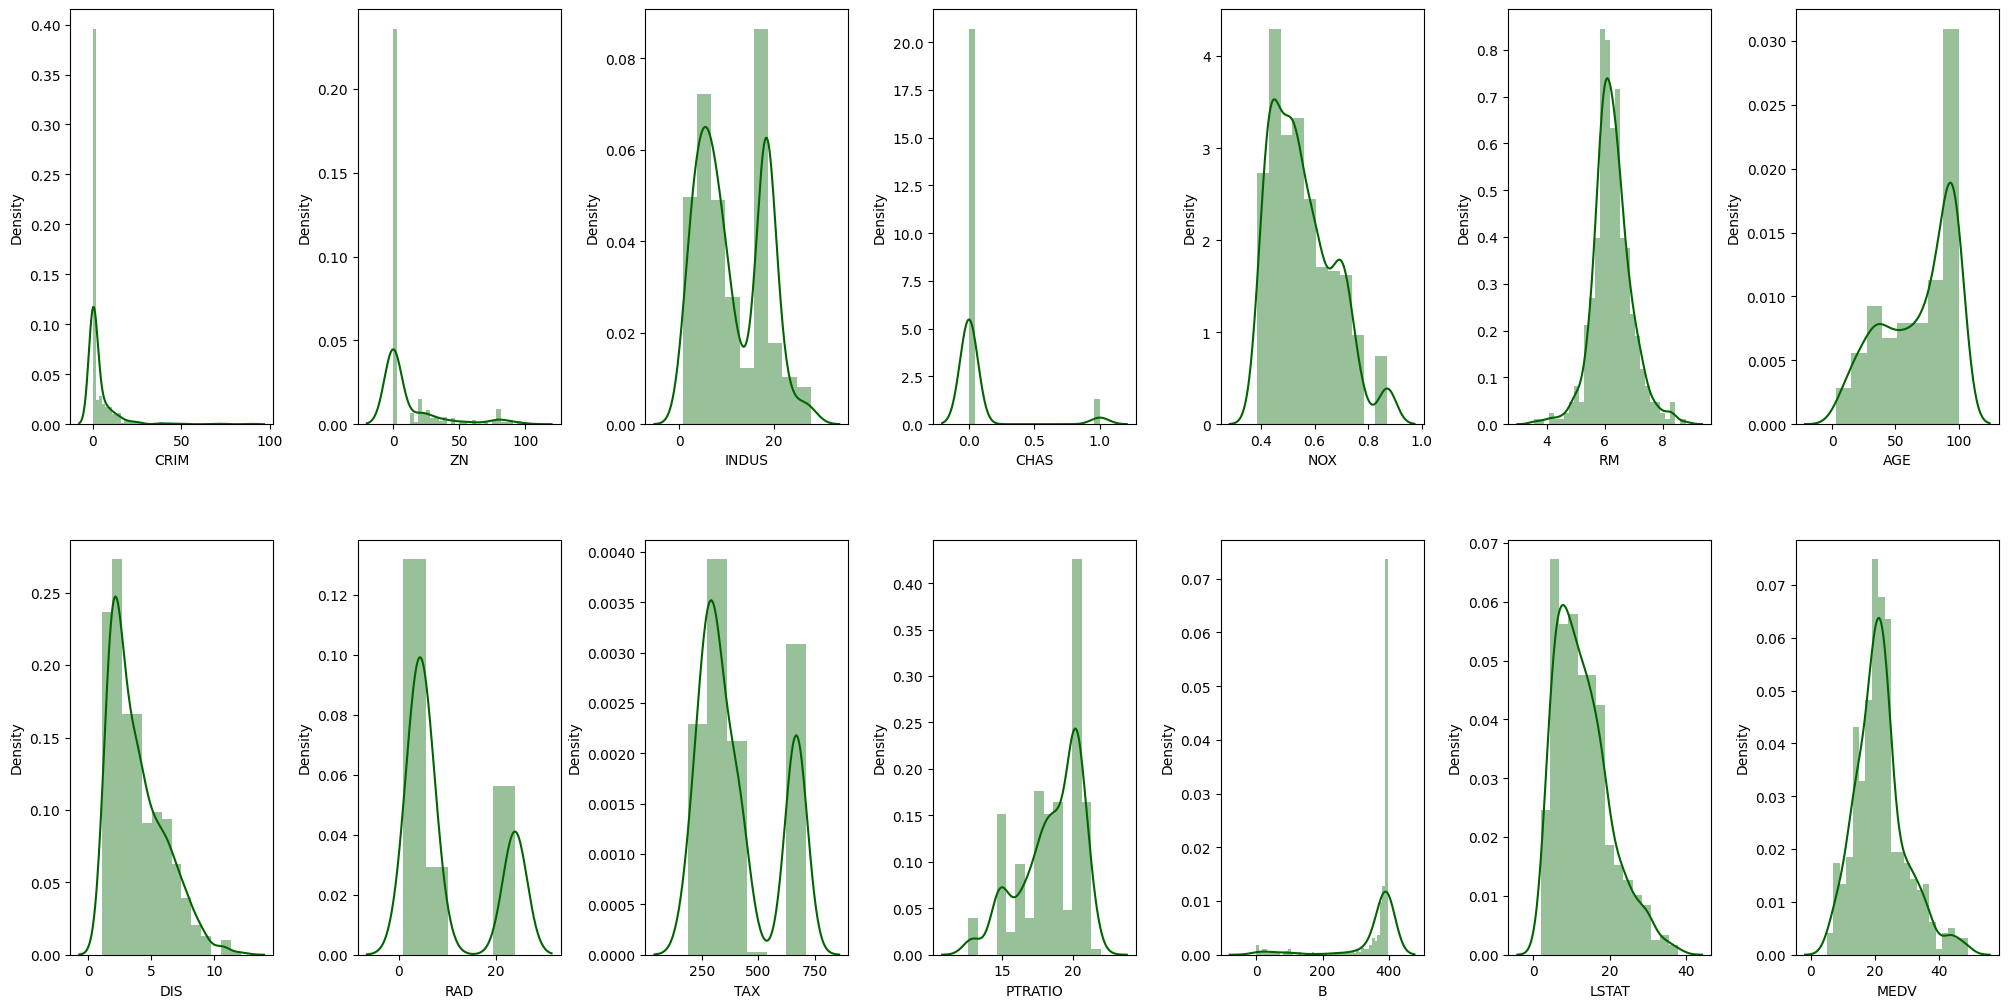

In [9]:
fig, axs = plt.subplots(ncols=7, nrows=2, figsize=(20,10))
index = 0
axs = axs.flatten()
for col_name, val in df.items():
    sns.distplot(val, ax=axs[index], color='darkgreen')
    index += 1

plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=5.0)
plt.show()

*The histogram also shows that columns CRIM, ZN, B has highly skewed distributions. Also MEDV looks to have a normal distribution (the predictions) and other colums seem to have norma or bimodel ditribution of data except CHAS (which is a discrete variable).*

*Now let's plot the pairwise correlation on data.*

<Axes: >

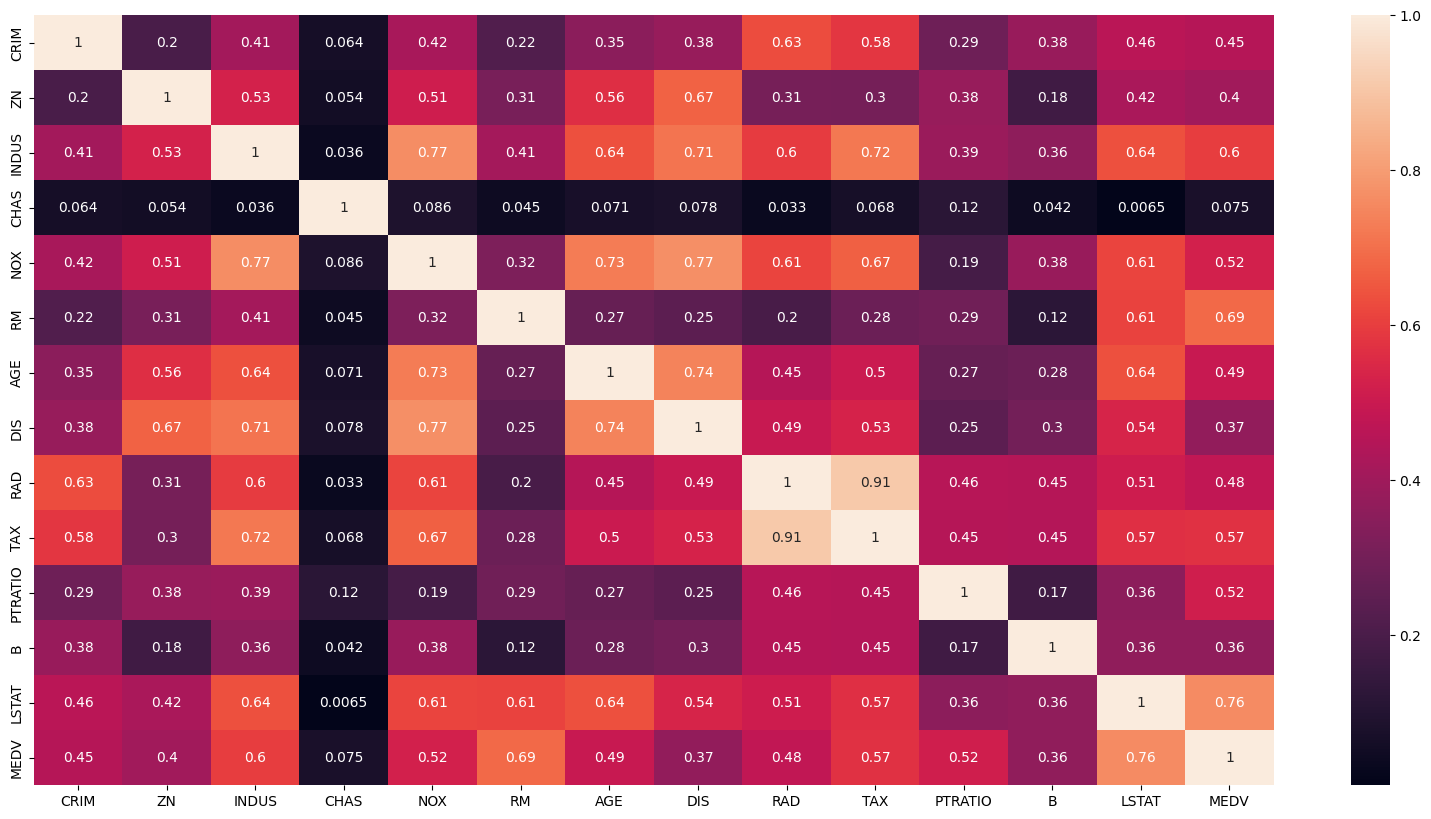

In [10]:
# Multivariate analysis - HeatMap
plt.figure(figsize=(20, 10))
sns.heatmap(df.corr().abs(),  annot=True)

*From correlation matrix, we see TAX and RAD are highly correlated features. The columns LSTAT, INDUS, RM, TAX, NOX, PTRAIO has a correlation score above 0.5 with MEDV which is a good indication of using as predictors. Let's plot these columns against MEDV.*

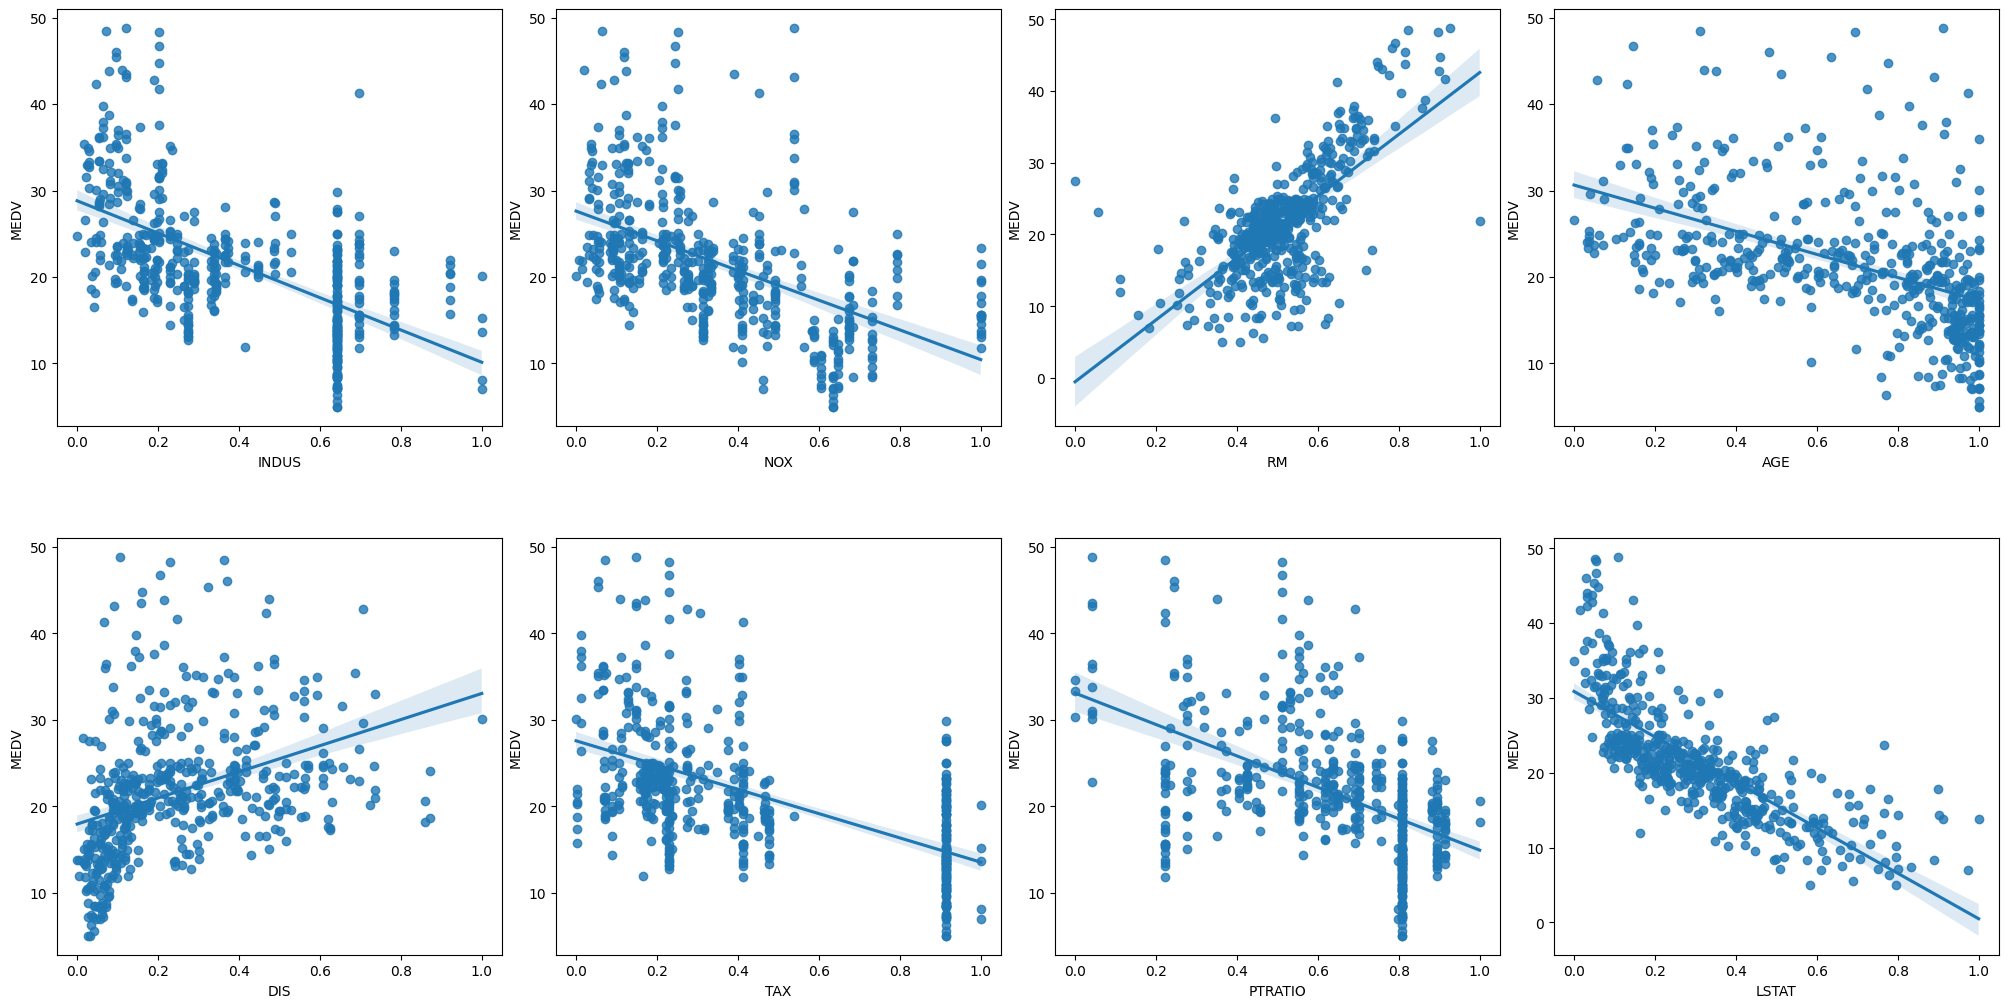

In [11]:
from sklearn import preprocessing

# Let's scale the data before plotting them against MEDV
min_max_scaler = preprocessing.MinMaxScaler()
column_sets = ['INDUS', 'NOX', 'RM', 'AGE', 'DIS', 'TAX', 'PTRATIO', 'LSTAT']
x = df.loc[:, column_sets]
y = df['MEDV']
#scaling the 'x' & 'y' variables

x = pd.DataFrame(data=min_max_scaler.fit_transform(x), columns=column_sets)
fig, axs = plt.subplots(ncols=4, nrows=2, figsize=(20, 10))
index = 0
axs = axs.flatten()
for i, k in enumerate(column_sets):
    sns.regplot(y=y, x=x[k], ax=axs[i])
plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=5.0)

*So with these analysis, we may try predict MEDV with 'LSTAT', 'INDUS', 'NOX', 'PTRATIO', 'RM', 'TAX', 'DIS', 'AGE' features. Let's try to remove the skewness of the data trough log transformation.*

In [12]:
# implementing log transformation with NumPy
y =  np.log1p(y)
for col in x.columns:
    if np.abs(x[col].skew()) > 0.3:
        x[col] = np.log1p(x[col])

# 5. Model building, Cross Validation & Evaluation 

*Let's try Linear, Ridge Regression on dataset first.*

In [13]:
from sklearn.linear_model import Ridge, LinearRegression
from sklearn.model_selection import KFold, cross_val_score

scores_map = {}

#1. Linear Regression
l_reg = LinearRegression()
kf = KFold(n_splits=10)

# creating the variables
score = cross_val_score(l_reg, x, y, cv=kf, scoring='neg_mean_squared_error')
print("LinearRegression MSE: %0.2f (+/- %0.2f)" % (score.mean(), score.std()))

# Recording the scores
scores_map['LinearRegression'] = score

#2. Ridge Regression
l_ridge = Ridge(alpha=0.5, solver='cholesky')
score = cross_val_score(l_ridge, x, y, cv=kf, scoring='neg_mean_squared_error')
scores_map['Ridge'] = score
print("Ridge MSE: %0.2f (+/- %0.2f)" % (score.mean(), score.std()))

# Lets try polinomial regression with L2 with degree for the best fit

#3.Polynomial Ridge Regression
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import PolynomialFeatures

model = make_pipeline(PolynomialFeatures(degree=5), Ridge())
scores = cross_val_score(model, x, y, cv=kf, scoring='neg_mean_squared_error')
scores_map['PolyRidge'] = scores
print("PolyRidge MSE: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std()))

LinearRegression MSE: -0.04 (+/- 0.04)
Ridge MSE: -0.04 (+/- 0.04)
PolyRidge MSE: -0.03 (+/- 0.03)


In [14]:
#4. Support Vector Regression (SVR)
from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV

svr_rbf = SVR(kernel='rbf', C=1e3, gamma=0.05)
scores = cross_val_score(svr_rbf, x, y, cv=kf, scoring='neg_mean_squared_error')
scores_map['SVR'] = scores
print("SupportVectorRegression MSE: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std()))

SupportVectorRegression MSE: -0.03 (+/- 0.03)


In [15]:
#5. DecissionTreeRegressor
from sklearn.tree import DecisionTreeRegressor

dtr = DecisionTreeRegressor(max_depth=10)
score = cross_val_score(dtr, x, y, cv=kf, scoring='neg_mean_squared_error')
scores_map['DecissionTreeRegressor'] = scores
print("DecissionTreeRegressor MSE: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std()))

DecissionTreeRegressor MSE: -0.03 (+/- 0.03)


In [16]:
#6. KNeighborsRegressor
from sklearn.neighbors import KNeighborsRegressor

knn = KNeighborsRegressor(n_neighbors=7)
score = cross_val_score(knn, x, y, cv=kf, scoring='neg_mean_squared_error')
scores_map['KNeighborsRegressor'] = scores
print("KNeighborsRegressor MSE: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std()))

KNeighborsRegressor MSE: -0.03 (+/- 0.03)


In [17]:
#7. GradientBoostingRegressor
from sklearn.ensemble import GradientBoostingRegressor

gbr = GradientBoostingRegressor(alpha=0.6,learning_rate=0.01, max_depth=4, min_samples_leaf=5, min_samples_split=5, n_estimators=50, random_state=42)
score = cross_val_score(gbr, x, y, cv=kf, scoring='neg_mean_squared_error')
scores_map['GradientBoostingRegressor'] = scores
print("GradientBoostingRegressor MSE: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std()))

GradientBoostingRegressor MSE: -0.03 (+/- 0.03)


*Let's plot k-fold results to see which model has better distribution of results. Let's have a look at the MSE distribution of these models with k-fold=10*

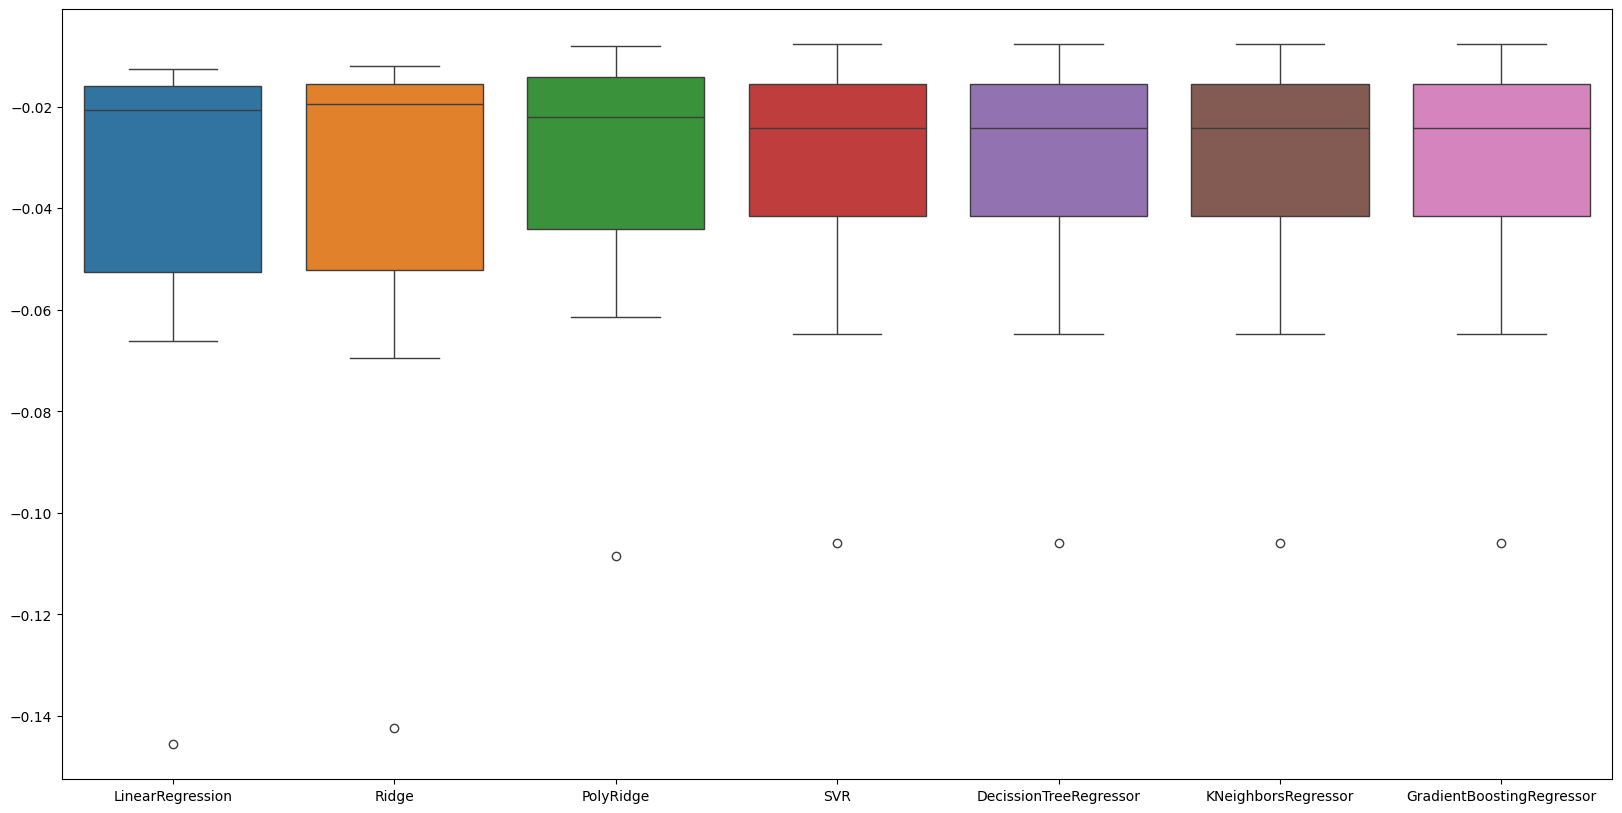

In [18]:
plt.figure(figsize=(20,10))
scores_map = pd.DataFrame(scores_map)
sns.boxplot(data=scores_map)
plt.show()

*Here, I can identifies the total error spread using Mean Squared Error. So, I can say that the Polynomial Ridge Regressor & SVR are performed good as compared to other models.*